# Analisi Best Model Anno 2018 Sessione 1
### Claudia Gabriela Ochoa Martinez (2020)

#### Analizzando il best model fornito dalla funzione pdredge possiamo allora applicare la funzione predict (pacchetto unmarked) per effettuare ulteriori valutazione sulla bontà del modello.

In [1]:
library(unmarked)

Loading required package: lattice



In [2]:
myunscale <- function (vals, norm.data, col.ids)  {
    cols <- if (missing(col.ids)) 1:NCOL(vals) else col.ids
    #if (length(cols) > NCOL(vals)) 
    #    stop("Incorrect dimension of data to unscale.")
    centers <- attr(norm.data, "scaled:center")[cols]
    scales <- attr(norm.data, "scaled:scale")[cols]
    unvals <- scale(vals[,cols], center = (-centers/scales), scale = 1/scales)
    unvals <- cbind(unvals,vals[,-which(names(vals) %in% cols)])
    attr(unvals, "scaled:center") <- attr(unvals, "scaled:scale") <- NULL
    unvals
}

In [3]:
load('Dati-modelli\\multimodel_2018_sessione_1_EYP6.RData')

In [4]:
best_mod <- occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    dominant + MDR + 1, data = arvicole, control = list(trace = 1, 
    maxit = 1e+07))

summary(best_mod)


initial  value 272.406741 
iter  10 value 128.215019
iter  20 value 125.330854
iter  30 value 125.323124
final  value 125.323122 
converged

Call:
occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    dominant + MDR + 1, data = arvicole, control = list(trace = 1, 
    maxit = 1e+07))

Occupancy (logit-scale):
                 Estimate    SE      z P(>|z|)
(Intercept)        -1.172 0.550 -2.129  0.0332
dominantMuschio     1.073 0.859  1.250  0.2114
dominantOther_Sp    0.895 0.915  0.978  0.3282
MDR                -0.857 1.301 -0.658  0.5103

Detection (logit-scale):
            Estimate     SE      z P(>|z|)
(Intercept)   0.7948 1.3158  0.604 0.54580
MDR           0.4135 1.1273  0.367 0.71377
orarioTr      0.0562 0.5055  0.111 0.91151
precip       -0.3700 0.8983 -0.412 0.68042
temper       -0.2244 0.0866 -2.591 0.00957
vento        -0.3181 0.4068 -0.782 0.43424

AIC: 270.6462 
Number of sites: 70
optim convergence code: 0
optim iterations: 56 
Bootstrap iterations: 0 



In [5]:
head(siteCovs_orig$dominant)
head(siteCovs(arvicole))

[1] "Graminacee" "Graminacee" "Graminacee" "Graminacee" "Graminacee"
[6] "Graminacee"

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,MDR,IQR,Esp.tr,cop_veg_ottavi,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7999612,0.4449731,0.6121266,-0.9638930,-0.03990354,-0.004945912,0.97220994,0.65969346,-0.7248291,-2.7977585,1.3660940,Graminacee
2,0.7678020,-0.7023655,0.1200460,-1.1064717,0.39997796,0.341267903,0.05432387,0.05605239,0.4943843,-1.1704790,-0.3135298,Graminacee
3,-0.9071587,0.2749970,-0.1449204,-1.1156660,0.51727969,-1.505205774,-0.33905587,-0.36649637,-0.8052168,-0.7365377,-0.3135298,Graminacee
4,-0.2639738,-0.9573296,-0.6370010,-1.1130010,0.39264660,-0.581968936,0.97220994,-1.15122977,-0.3764824,-1.1976003,1.3660940,Graminacee
5,0.6070058,-0.7236125,-0.4288130,-1.0064001,0.39997796,-0.235755121,0.70995678,-0.81922717,0.3470069,-1.1704790,-0.3135298,Graminacee
6,0.1514164,-0.9360826,-0.6370010,-0.9597622,0.51727969,-0.697373540,0.57883019,-1.15122977,0.0254561,-0.7365377,0.8062194,Graminacee


In [6]:
# Predict abundance at specified covariate values.
df_indicato <- siteCovs(arvicole)
alt_m.seq <- seq(min(df_indicato$alt_m), max(df_indicato$alt_m), length=100)
cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
Esp.tr.seq <- seq(min(df_indicato$Esp.tr), max(df_indicato$Esp.tr), length=100)
MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)

newdat_graminacee <- data.frame(
    alt_m = alt_m.seq,
    cop_veg_ottavi = cop_veg_ottavi.seq,
    Esp.tr = Esp.tr.seq,
    MDR = MDR.seq,
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    alt_m = alt_m.seq,
    cop_veg_ottavi = cop_veg_ottavi.seq,
    Esp.tr = Esp.tr.seq,
    MDR = MDR.seq,
    dominant = "Muschio"
)
newdat_other <- data.frame(
    alt_m = alt_m.seq,
    cop_veg_ottavi = cop_veg_ottavi.seq,
    Esp.tr = Esp.tr.seq,
    MDR = MDR.seq,
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)
head(newdata)

,alt_m,cop_veg_ottavi,Esp.tr,MDR,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.534341,-1.433279,-2.797759,-1.392686,Graminacee
2,-1.499264,-1.393692,-2.746255,-1.336590,Graminacee
3,-1.464186,-1.354105,-2.694752,-1.280494,Graminacee
4,-1.429109,-1.314518,-2.643249,-1.224398,Graminacee
5,-1.394032,-1.274931,-2.591746,-1.168302,Graminacee
6,-1.358954,-1.235344,-2.540243,-1.112207,Graminacee


In [7]:
siti_considerati <- 70-length(best_mod@sitesRemoved) # In totale, al massimo nelle analisi consideriamo 70 siti, alcuni anni meno
re <- ranef(best_mod)
EBUP <- bup(re, stat="mean")
CI <- confint(re, level=0.90)
rbind(PAO = c(Estimate = sum(EBUP), colSums(CI))/siti_considerati)

,Estimate,5%,95%
PAO,0.3531944,0.2428571,0.8571429


In [8]:
Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("alt_m","cop_veg_ottavi","Esp.tr","MDR"))
tail(Elambda_unscaled)

,alt_m,cop_veg_ottavi,Esp.tr,MDR,Predicted,SE,lower,upper,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
295,2802.670,6.646465,52.50505,202.7071,0.02655704,0.1210616,2.816852e-06,0.9962296,Other_Sp
296,2802.933,6.717172,54.40404,204.5657,0.02534246,0.1174486,2.331124e-06,0.9965638,Other_Sp
297,2803.196,6.787879,56.30303,206.4242,0.02418205,0.1139049,1.929045e-06,0.9968686,Other_Sp
298,2803.460,6.858586,58.20202,208.2828,0.02307352,0.1104321,1.596233e-06,0.9971467,Other_Sp
299,2803.723,6.929293,60.10101,210.1414,0.02201465,0.1070315,1.320771e-06,0.9974002,Other_Sp
300,2803.986,7.000000,62.00000,212.0000,0.02100334,0.1037038,1.092793e-06,0.9976314,Other_Sp


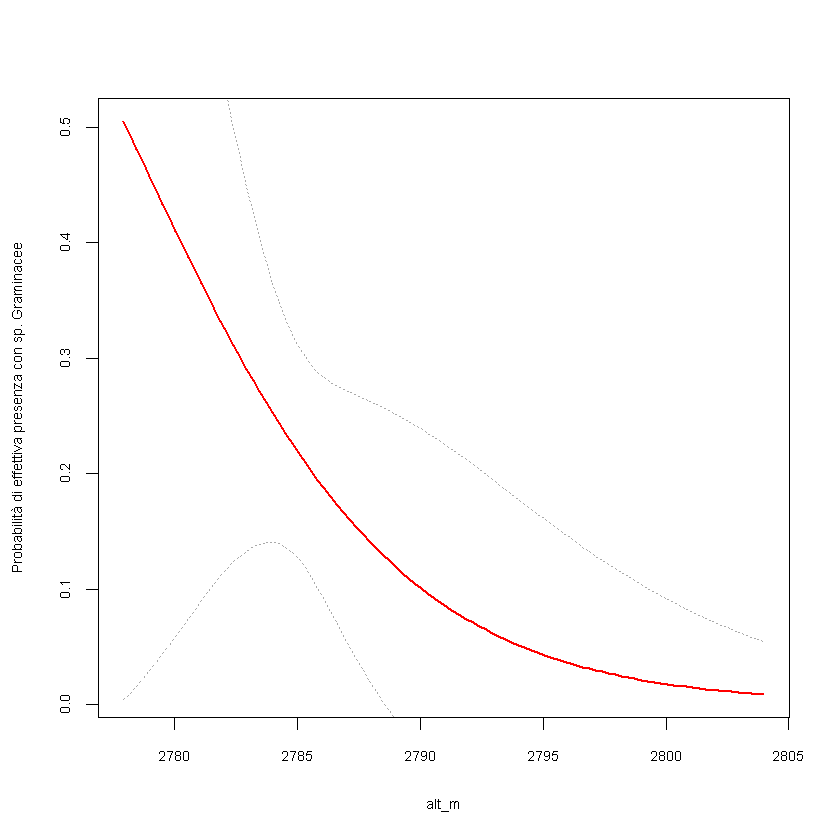

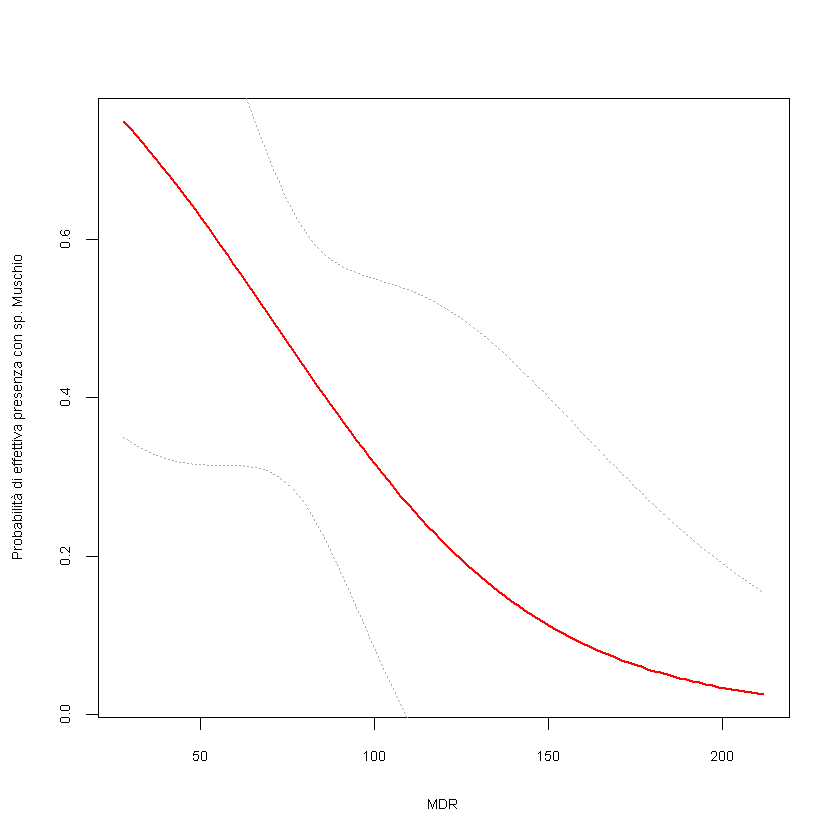

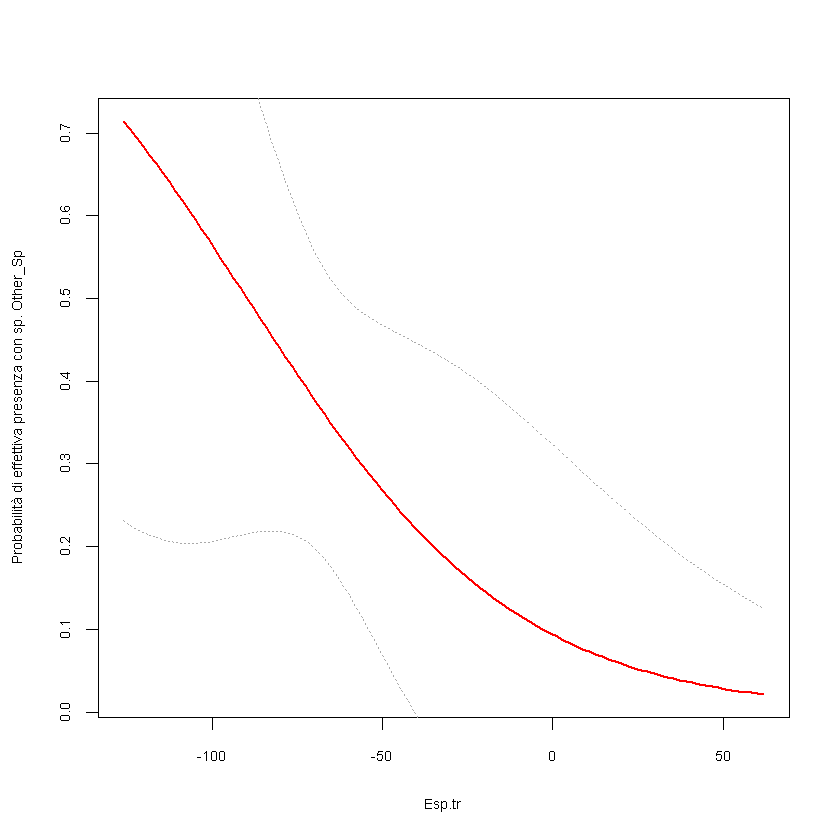

In [9]:
with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(alt_m, Predicted, xlab="alt_m", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(alt_m, Predicted+SE, lty=3, col="dark grey")
   lines(alt_m, Predicted-SE, lty=3, col="dark grey")
  #lines(cop_veg_ottavi, upper, lty=1, col="grey")
  #lines(cop_veg_ottavi, lower, lty=1, col="grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(MDR, Predicted+SE, lty=3, col="dark grey")
   lines(MDR, Predicted-SE, lty=3, col="dark grey")
  #lines(MDR, upper, lty=1, col="grey")
  #lines(MDR, lower, lty=1, col="grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(Esp.tr, Predicted, xlab="Esp.tr", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Other_Sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(Esp.tr, Predicted+SE, lty=3, col="dark grey")
   lines(Esp.tr, Predicted-SE, lty=3, col="dark grey")
  #lines(Esp.tr, upper, lty=1, col="grey")
  #lines(Esp.tr, lower, lty=1, col="grey")
})

#### Possiamo notare che vi è una maggior probabilità di cattura con l'aumentare dell'altitudine, col'aumentare delle dimensione delle rocce ed l'aumento della esposizione.

### Proseguiamo con ulteriori valutazioni sulla temperatura

In [10]:
#### predizioni di abbondanza con valori di covariate specifici.
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)
alt_m.seq <- seq(min(df_indicato$alt_m), max(df_indicato$alt_m), length=100)
cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
Esp.tr.seq <- seq(min(df_indicato$Esp.tr), max(df_indicato$Esp.tr), length=100)
MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    alt_m = alt_m.seq,
    MDR = mean(df_indicato$MDR),
    temper = temper.seq,
    orario = "Al",
    vento = vento.seq,
    precip = precip.seq
)


Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)



In [11]:
Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("alt_m","MDR"))
tail(Elambda_unscaled)

,alt_m,MDR,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,2802.670,74.14286,0.01412439,0.01480452,0.001779926,0.1032288,16.95051,Al,2.783838,0.9494949
96,2802.933,74.14286,0.01369510,0.01457091,0.001673458,0.1031535,17.04040,Al,2.807071,0.9595960
97,2803.196,74.14286,0.01327868,0.01433813,0.001573231,0.1030850,17.13030,Al,2.830303,0.9696970
98,2803.460,74.14286,0.01287476,0.01410630,0.001478893,0.1030233,17.22020,Al,2.853535,0.9797980
99,2803.723,74.14286,0.01248297,0.01387555,0.001390108,0.1029679,17.31010,Al,2.876768,0.9898990
100,2803.986,74.14286,0.01210296,0.01364601,0.001306560,0.1029187,17.40000,Al,2.900000,1.0000000


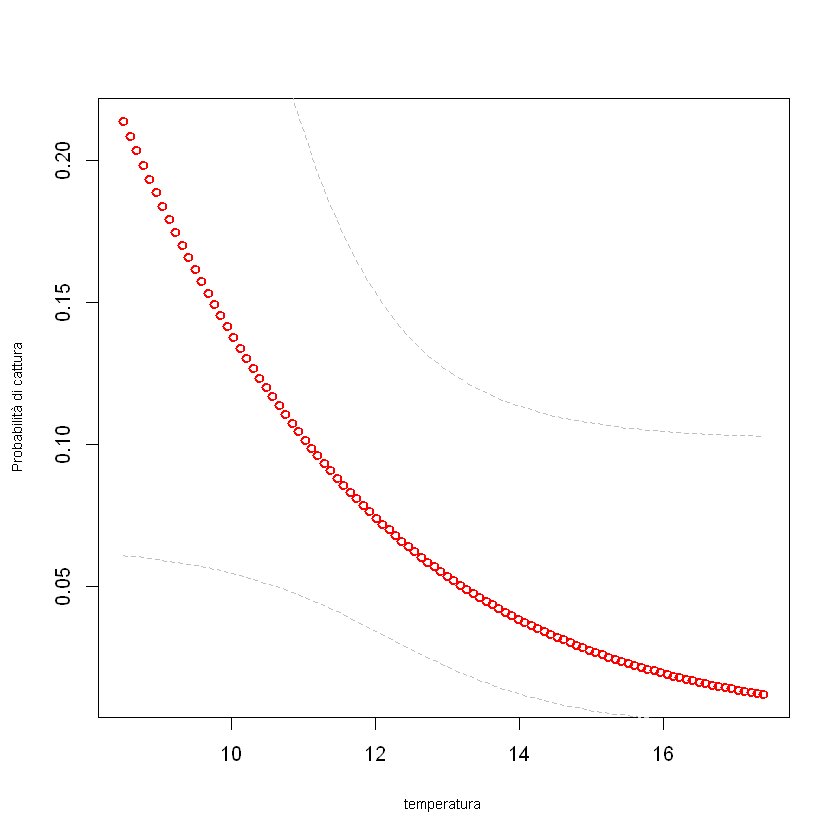

In [12]:
with(Elambda_unscaled, {
    plot(temper, Predicted, xlab="temperatura",
        ylab="Probabilità di cattura",
        cex.lab=0.7, lwd=2, col="red")
    lines(temper, upper, lty=2, col="grey")
    lines(temper, lower,lty=2, col="grey" )
})  

#### Questo dimostra che per la singola sessione è molto difficile mostrare i trend sulla probabilità di avvistamento 